Welcome to the Carbon Footprint Application!

Menu:
1. Calculate Carbon Footprint
2. View Saved Data
3. Exit

--- Carbon Footprint Report ---
Company Name: GreenTech Ltd
Electricity: 460.00 kg CO2
Vehicle: 84.00 kg CO2
Waste: 2.00 kg CO2
Water: 0.30 kg CO2
Total Carbon Footprint: 546.30 kg CO2

Data saved successfully!


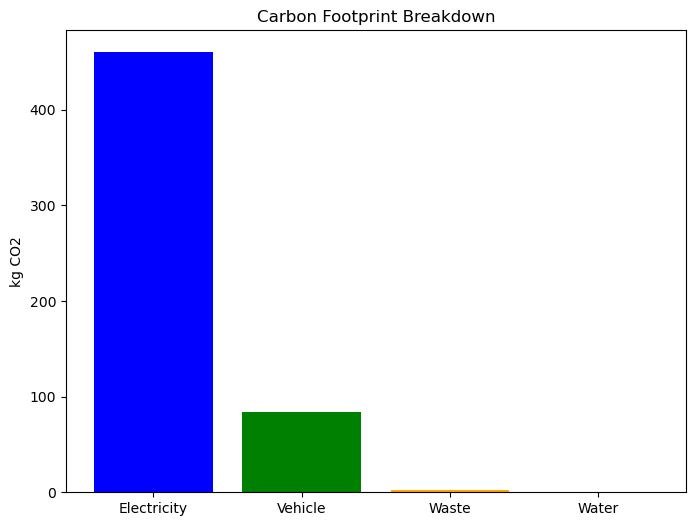


Menu:
1. Calculate Carbon Footprint
2. View Saved Data
3. Exit

--- Saved Carbon Footprint Data ---
Company Name, Electricity (kg CO2), Vehicle (kg CO2), Waste (kg CO2), Water (kg CO2), Total Footprint (kg CO2)
natto, 31.28, 4.83, 1.2000000000000002, 0.051000000000000004, 37.361000000000004
aldi, 31.28, 4.41, 3.4000000000000004, 0.0345, 39.1245
aldi, 21.16, 4.83, 4.5, 0.0015, 30.491500000000002
saeed ahmed, 31.28, 4.83, 1.2000000000000002, 0.051000000000000004, 37.361000000000004
GreenTech Ltd, 460.0, 84.0, 2.0, 0.3, 546.3

Menu:
1. Calculate Carbon Footprint
2. View Saved Data
3. Exit
Exiting the application. Goodbye!


In [3]:
import matplotlib.pyplot as plt
import csv
import os


# Constants for carbon footprint
ELectric_emission = 0.92    # kg CO2 per kWh
Vehicle_emission = 0.21     # kg CO2 per mile
Waste_emission = 0.1        # kg CO2 per kg of waste
Water_emission = 0.0015     # kg CO2 per liter

# File to saved data
DATA_FILE = "carbon_footprint_data.csv"

# Method to calculate carbon footprint
def calculate_fprint(electricity_cal, vehicle_cal, waste_cal, water_cal):

    electric_fprint_cal = electricity_cal * ELectric_emission
    vehicle_fprint_cal = vehicle_cal * Vehicle_emission
    waste_fprint_cal = waste_cal * Waste_emission
    water_fprint_cal = water_cal * Water_emission
    
    total_footprint = electric_fprint_cal + vehicle_fprint_cal + waste_fprint_cal + water_fprint_cal
    return electric_fprint_cal, vehicle_fprint_cal, waste_fprint_cal, water_fprint_cal, total_footprint


# Method to reducing carbon footprint
def generate_suggestions(electric_red, vehicle_red, waste_red, water_red):
    suggestions = []
    if electric_red > 500:
        suggestions.append("Reduce electricity usage by switching to LED lights or renewable energy sources.")
    if vehicle_red > 300:
        suggestions.append("Consider carpooling or using public transportation to reduce vehicle emissions.")
    if waste_red > 50:
        suggestions.append("Recycle more to reduce waste emissions.")
    if water_red > 1000:
        suggestions.append("Conserve water by fixing leaks and using efficient appliances.")
    return suggestions

# Method to Analysis carbon footprint 
def visualize_footprint(electric_analysis, vehicle_analysis, waste_analysis, water_analysis):
    categories = ['Electricity', 'Vehicle', 'Waste', 'Water']
    values = [electric_analysis, vehicle_analysis, waste_analysis, water_analysis]

    plt.figure(figsize=(8, 6))
    plt.bar(categories, values, color=['blue', 'green', 'orange', 'purple'])
    plt.title("Carbon Footprint Breakdown")
    plt.ylabel("kg CO2")
    plt.show()

# Method to save data to a CSV file
def save_data(company_name, elec_fp, veh_fp, waste_fp, water_fp, total_fp):
    file_exists = os.path.isfile(DATA_FILE)
    with open(DATA_FILE, mode="a", newline="") as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["Company Name", "Electricity (kg CO2)", "Vehicle (kg CO2)", "Waste (kg CO2)", "Water (kg CO2)", "Total (kg CO2)"])
        writer.writerow([company_name, elec_fp, veh_fp, waste_fp, water_fp, total_fp])
    print("\nData saved successfully!")

# Method to display saved data
def display_saved_data():
    if not os.path.isfile(DATA_FILE):
        print("No data found.")
        return
    print("\n--- Saved Carbon Footprint Data ---")
    with open(DATA_FILE, mode="r") as file:
        reader = csv.reader(file)
        for row in reader:
            print(", ".join(row))
    input("\nPress Enter to return to the main menu...")

# Main program
def main():
    print("Welcome to the Carbon Footprint Application!")
    
    while True:
        print("\nMenu:")
        print("1. Calculate Carbon Footprint")
        print("2. View Saved Data")
        print("3. Exit")
        choice = input("Enter your choice (1/2/3): ")

        if choice == "1":
            # Collect user data
            company_name = input("Enter Company Name: ")
            electricity = float(input("Enter your monthly electricity usage (kWh): "))
            vehicle = float(input("Enter your monthly vehicle usage (miles): "))
            waste = float(input("Enter your monthly waste generated (kg): "))
            water = float(input("Enter your monthly water consumption (liters): "))

            # Calculate footprint
            elec_fp, veh_fp, waste_fp, water_fp, total_fp = calculate_fprint(electricity, vehicle, waste, water)

            # Display results
            print("\n--- Carbon Footprint Report ---")
            print(f"Company Name: {company_name}")
            print(f"Electricity: {elec_fp:.2f} kg CO2")
            print(f"Vehicle: {veh_fp:.2f} kg CO2")
            print(f"Waste: {waste_fp:.2f} kg CO2")
            print(f"Water: {water_fp:.2f} kg CO2")
            print(f"Total Carbon Footprint: {total_fp:.2f} kg CO2")

            # Save data
            save_data(company_name, elec_fp, veh_fp, waste_fp, water_fp, total_fp)

            # Visualize footprint
            visualize_footprint(elec_fp, veh_fp, waste_fp, water_fp)

        elif choice == "2":
            display_saved_data()

        elif choice == "3":
            print("Exiting the application. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
